載入套件

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

下載整理數據

In [2]:

(X_train, y_train0), (X_test, y_test0) = datasets.fashion_mnist.load_data()

X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate, add

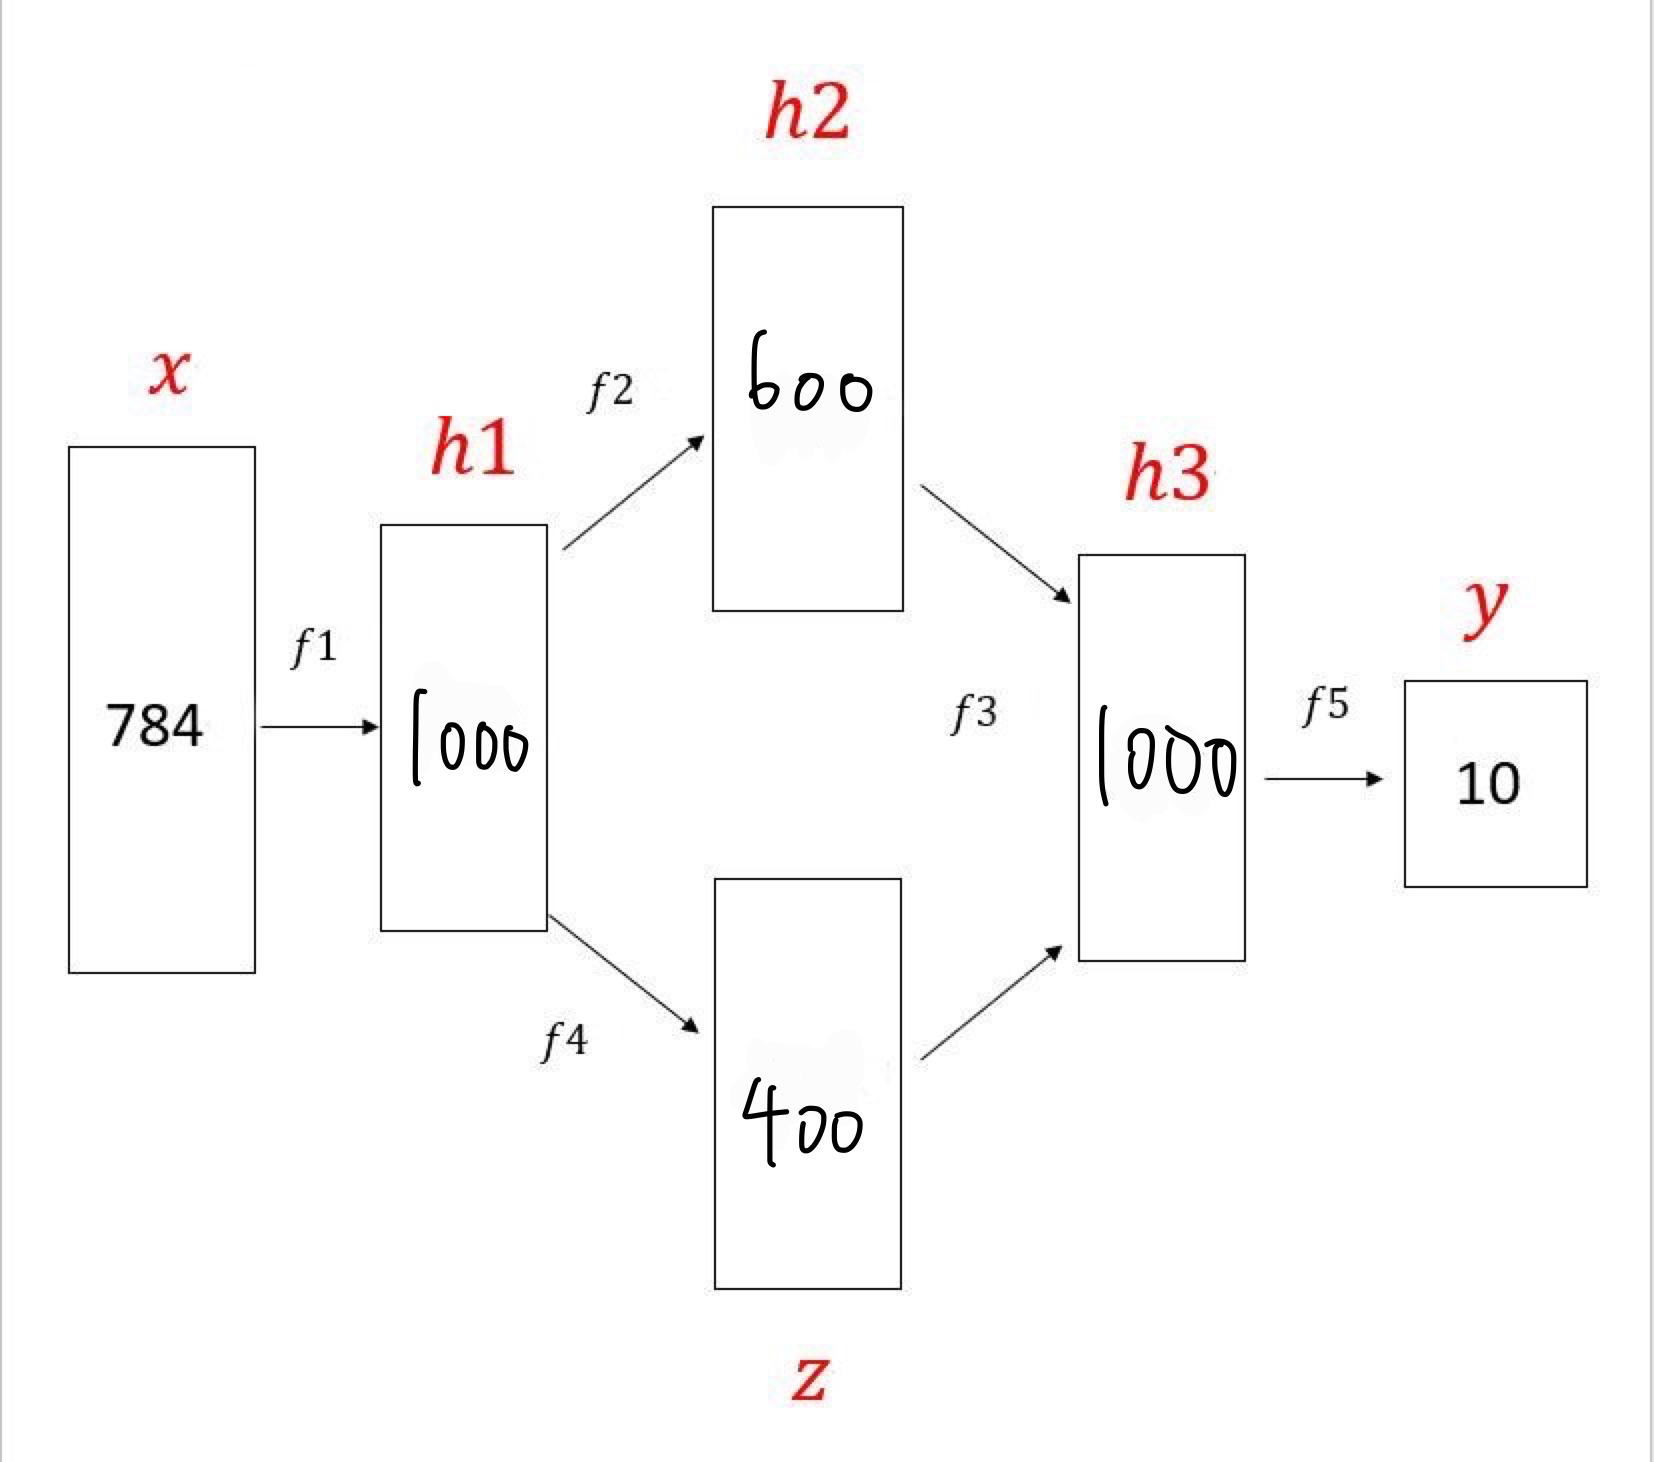

將h1修改為1000向量
h2 改為總和為1000向量

In [14]:
f_1 = Dense(1000, activation='sigmoid')
f_2 = Dense(600, activation='sigmoid')
f_4 = Dense(400, activation='relu')
f_3 = Dense(1000, activation='sigmoid')
f_5 = Dense(10, activation='softmax')

In [15]:
x = Input(shape=(784,))

In [16]:
h_1 = f_1(x)
h_2 = f_2(h_1)
z = f_4(h_1)
h_3 = concatenate([h_2, z])
y = f_5(h_3)

In [17]:
split_model = Model(x, y)
split_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 1000)         785000      input_2[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 600)          600600      dense_5[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 400)          400400      dense_5[0][0]                    
____________________________________________________________________________________________

In [18]:
split_model.compile(loss='mse', 
              optimizer=Adam(), 
              metrics=['accuracy'])

訓練

In [21]:
split_model.fit(X_train, y_train, 
                batch_size=100, 
                epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 210us/sample - loss: 0.0167 - acc: 0.8850
Epoch 2/5
60000/60000 [==============================] - 11s 184us/sample - loss: 0.0159 - acc: 0.8916
Epoch 3/5
60000/60000 [==============================] - 11s 176us/sample - loss: 0.0152 - acc: 0.8956
Epoch 4/5
60000/60000 [==============================] - 10s 172us/sample - loss: 0.0145 - acc: 0.9021
Epoch 5/5
60000/60000 [==============================] - 11s 175us/sample - loss: 0.0139 - acc: 0.9051


In [22]:
score = split_model.evaluate(X_train, y_train, batch_size=10000)
print(f'Loss: {score[0]}')
print(f'準確率: {score[1]*100}')

60000/60000 [==============================] - 2s 33us/sample - loss: 0.0131 - acc: 0.9119
Loss: 0.013117757936318716
準確率: 91.18666648864746


透過此方式將層定義成明確函數與變數連接讓整體模型的準確性表現不錯，batch size下降了，但是從結果看準確性並無明顯的下降